<a href="https://colab.research.google.com/github/lucianodevmobile123/MobileDev/blob/main/Qualidade_do_solo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Instalar e importar bibliotecas
!pip install roboflow tensorflow opencv-python-headless --quiet

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.6 MB/s eta 0:00:00


In [2]:
# 2. Conectar ao Roboflow e baixar o dataset
from roboflow import Roboflow
rf = Roboflow(api_key="cSIFySpdfMcOOe7pToAe")
project = rf.workspace("aks-osfwj").project("soil-classification-c0jxk-7chfh")
dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Soil-Classification-1 in folder:: 100%|██████████| 164/164 [00:00<00:00, 3589.14it/s]


In [3]:
# 3. Preparar os dados
image_dir = dataset.location + "/train"
labels = os.listdir(image_dir)

IMG_SIZE = 224
X = []
y = []

for label in labels:
    path = os.path.join(image_dir, label)
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(labels.index(label))
        except:
            pass

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes=len(labels))

In [4]:
# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 5. Construir o modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [6]:
# 6. Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.0683 - loss: 7.0760 - val_accuracy: 0.3000 - val_loss: 16.0006
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3385 - loss: 9.4150 - val_accuracy: 0.3000 - val_loss: 3.9072
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3812 - loss: 2.4646 - val_accuracy: 0.3500 - val_loss: 1.9749
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4470 - loss: 1.7607 - val_accuracy: 0.3500 - val_loss: 1.8293
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4713 - loss: 1.4700 - val_accuracy: 0.4500 - val_loss: 1.6773
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6241 - loss: 1.1904 - val_accuracy: 0.5000 - val_loss: 1.6391
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6458 - loss: 0.9962 - val_accuracy: 0.4000 - val_loss: 1.7922
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7002 - loss: 0.9791 - val_accuracy: 0.6000 - val_loss: 1.1379
Epoch 9/10
3/

In [7]:
# 7. Avaliar o modelo
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Acurácia no teste: {acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - accuracy: 0.6000 - loss: 1.1242

✅ Acurácia no teste: 60.00%


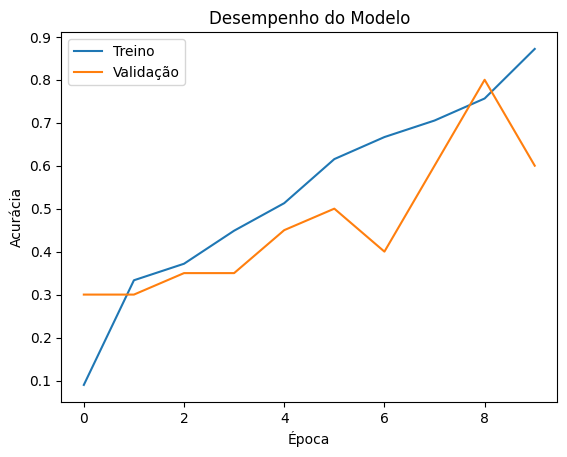

In [8]:
# 8. Exibir gráfico de desempenho
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Desempenho do Modelo')
plt.show()
